# IRIS Research Project  - Final Python Implementation



## **Sreesaketh Karri**


### PROJECT DESCRIPTION:
Medical Image recognition with Optical Character Recognition (OCR) using Tesseract involves extracting textual information from medical images to enhance data accessibility and analysis. Tesseract, an open-source OCR engine, is adapted for recognizing text within diverse medical images, including radiology reports, pathology slides, and medical charts. By converting images into machine-readable text, healthcare professionals can streamline information retrieval, improve documentation accuracy, and enable efficient data mining. Tesseract's versatility allows integration with medical imaging systems, aiding in automating tasks such as transcription, diagnosis, and research. This advancement contributes to enhanced clinical workflows, information sharing, and medical decision-making processes within the healthcare domain.


# **Enhancement-1 : REQUIREMENTS**

### Inputs :
1) The input consists of a set of ingredients (refer to the picture below) and their respective levels in a product, which are captured in a file (e.g., CSV). These attributes and their levels are obtained through standard OCR steps (scanning, masking, NLTK) from the product's label.


2) Patients health profile in context: ex: diabetic: type ; Blood Pressure- values : Cholesterol values

  

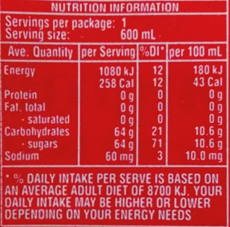

# Methodology :
Prepare a "reference data set" that includes key-value pairs of "ingredient" and "recommended level." This data set will exclusively encompass ingredients that are detrimental to health, as listed below, with threshold levels established in accordance with standard health recommendations. This data is static.

“Reference data set”  will have harmful threshold levels for all of the above ingredients as recommended by health department.


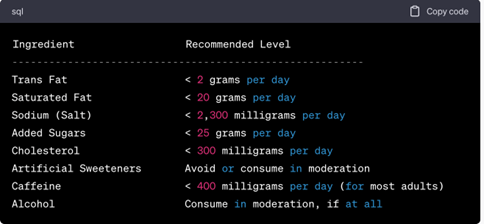

# Healthy quantity of some 100 ingredients :

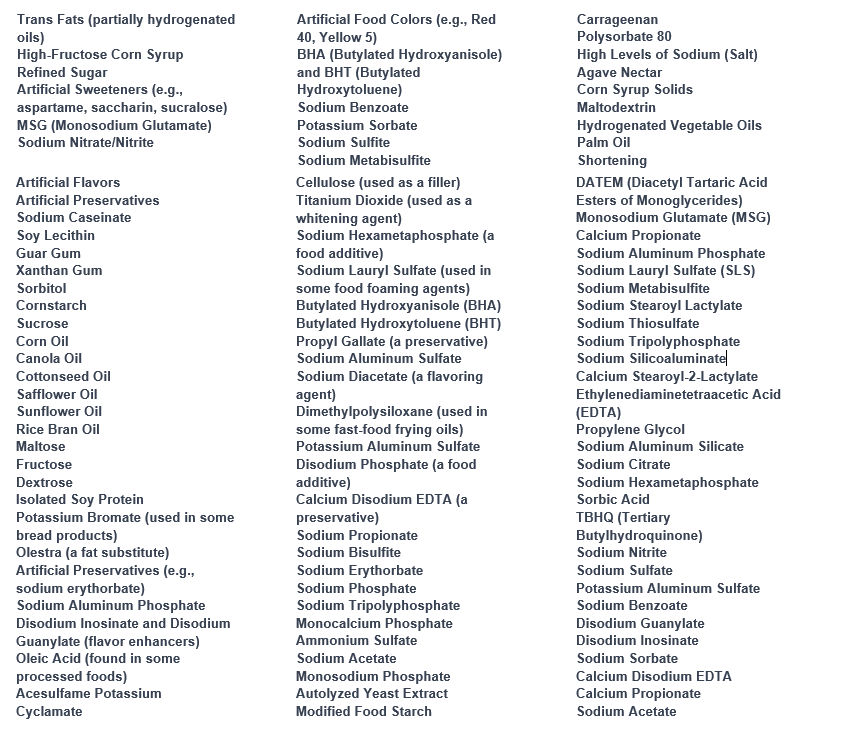

# **<hr>**

# **ENHANCEMENT : PYTHON IMPLEMENTATION STEPS:**

# PYTHON IMPLEMENTATION STEPWISE

**Step 1: Data Collection**
- Gather a collection of images or PDFs containing nutrition information. These documents should be in a format that can be processed by Pytesseract OCR.

**Step 2: Image Preprocessing**
- Preprocess the images, if needed, to improve OCR accuracy. This may involve resizing, noise reduction, or contrast adjustments.

**Step 3: OCR Processing**
- Utilize Pytesseract OCR to extract text from the images or PDFs. This step will convert the nutrition information into machine-readable text.

**Step 4: Text Parsing**
- Parse the OCR output to extract relevant information, such as ingredient details, nutritional values, serving sizes, etc.

**Step 5: Data Cleaning**
- Clean the extracted data by removing any irrelevant or noisy information. Ensure consistency in data format.

**Step 6: Natural Language Processing (NLTK)**
- Implement NLTK to perform text analysis and processing tasks, such as tokenization, part-of-speech tagging, and named entity recognition.

**Step 7: Ingredient Extraction**
- Use NLTK to identify and extract ingredient details from the cleaned text. This may involve defining patterns or rules for recognizing ingredients.

**Step 8: Nutritional Data Extraction**
- Extract nutritional values, such as calories, fats, proteins, and carbohydrates, using NLTK and regular expressions.

**Step 9: Dataset Creation**
- Organize the extracted data into a structured format, such as a CSV file, where each row represents a product or nutrition label, and columns represent attributes like ingredients and nutritional values.

**Step 10: Ingredient Comparison**
- Compare the extracted ingredient details against predefined thresholds for harmful substances. If an ingredient surpasses the threshold, calculate the excess amount.

**Step 11: User Notification**
- If an ingredient exceeds the threshold, inform the user about the specific ingredient and the amount it surpasses the harmful threshold.

**Step 12: Data Presentation**
- Present the results in two formats:
    - Graph 1: Create a bar graph with the excess ingredients on the X-axis and the difference values on the Y-axis (in decreasing order of harm).
    - Graph 2: Generate histograms showing the ingredients against safe and exceeding values.

**Step 13: List Generation**
- Create a list of ingredients arranged in descending order of harm, with the most harmful at the top.

**Step 14: Detailed Explanation**
- Implement a feature where if a user clicks on an ingredient in the list, they receive a detailed explanation of that ingredient and why it may not be suitable for them.

**Step 15: User Feedback**
- Provide feedback to the user based on the comparison results. If the value is within the recommended intake, suggest "You are consuming the right quantity." Otherwise, raise an alert and print "The excess amount by subtracting the Recommended Intake from the Actual Intake."

**Step 16: Conversion to PER SERVING (50 grams)**

For each ingredient in the dataset, determine whether the input values are provided per serving (in grams) or as a percentage of daily value (%DV).
If the values are in grams per serving, proceed with the comparison directly.
If the values are in percentage (%DV), convert them to grams per serving using a predefined formula, which can be as follows:
Apply this conversion to each ingredient's values as per the provided %DV, ensuring that all values are standardized to PER SERVING (50 grams) for accurate comparison.
This step ensures that all ingredient values are in a consistent format (PER SERVING) for precise comparison and assessment of harmful thresholds. Implement this conversion model within your Python code to enhance the accuracy of the analysis.


In [1]:
!git clone https://github.com/radhakrishnan-omotec/ocr_repo.git

Cloning into 'ocr_repo'...
remote: Enumerating objects: 195, done.
remote: Counting objects: 100% (110/110), done.
remote: Compressing objects: 100% (106/106), done.
remote: Total 195 (delta 63), reused 15 (delta 4), pack-reused 85
Receiving objects: 100% (195/195), 27.56 MiB | 22.58 MiB/s, done.
Resolving deltas: 100% (107/107), done.


# **PART A - OCR using Tesseract**

In [2]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 18 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (3,451 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [3]:
!pip install pytesseract

In [4]:
import pytesseract
import cv2
import shutil
import os
import random
try:
    from PIL import Image
except ImportError:
    import Image

# **Step 1: Data Collection**

***Gather a collection of images containing nutrition information. These documents should be in a format that can be processed by Pytesseract OCR.***

## ENERGY DRINK INPUT INGREDIENTS

### Import OCR Image using Google Colab

In [5]:
from google.colab import files

uploaded = files.upload()

Saving IngredientInput1.png to IngredientInput1.png


### Load OCR Image for Tesseract

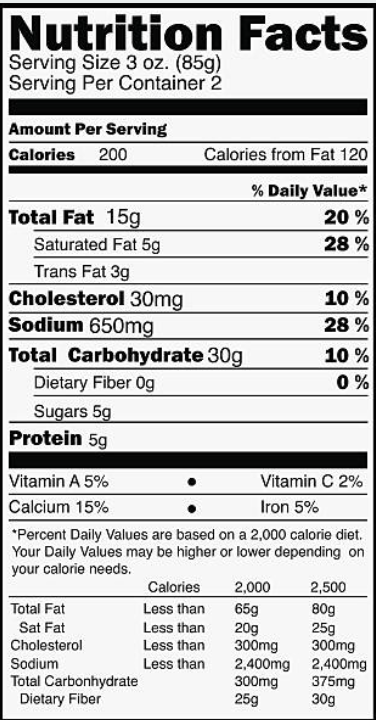

In [6]:
#from google.colab.patches import cv2_imshow

img1 = Image.open('/content/ocr_repo/30-OCT/input/IngredientInput1.png')
display(img1)

### Preprocessing of images using OpenCV



We will write basic functions for different preprocessing methods
- grayscaling
- thresholding
- dilating
- eroding
- opening
- canny edge detection
- noise removal
- deskwing
- template matching.

Different methods can come in handy with different kinds of images.

In [7]:
import re
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

In [8]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)

#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

Blue =  [[237 237 237 ... 237 237 237]
 [237 237 237 ... 237 237 237]
 [237 237 237 ... 237 237 237]
 ...
 [  4   5 109 ... 103   8   6]
 [  3   8  94 ...  97  18   6]
 [ 15   7  14 ...  12   1   4]]
Green =  [[237 237 237 ... 237 237 237]
 [237 237 237 ... 237 237 237]
 [237 237 237 ... 237 237 237]
 ...
 [  4   5 109 ... 103   8   6]
 [  3   8  94 ...  97  18   6]
 [ 15   7  14 ...  12   1   4]]
Red =  [[233 233 233 ... 233 233 233]
 [233 233 233 ... 233 233 233]
 [233 233 233 ... 233 233 233]
 ...
 [  4   5 109 ... 103   8   6]
 [  3   8  94 ...  97  18   6]
 [ 15   7  14 ...  12   2   4]]


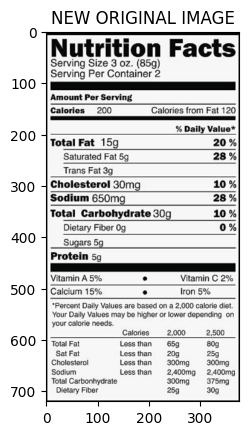

In [9]:
# Plot original image

image = cv2.imread('/content/ocr_repo/30-OCT/input/IngredientInput1.png')
b,g,r = cv2.split(image)
print("Blue = ", b)
print("Green = ", g)
print("Red = ", r)
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img)
plt.title('NEW ORIGINAL IMAGE')
plt.show()

### Preprocessing of Image

In [10]:
# Preprocess image

gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)
noise_removal = remove_noise(canny)
deskew

images = {'gray': gray,
          'thresh': thresh,
          'opening': opening,
          'canny': canny}

### Plot images after preprocessing

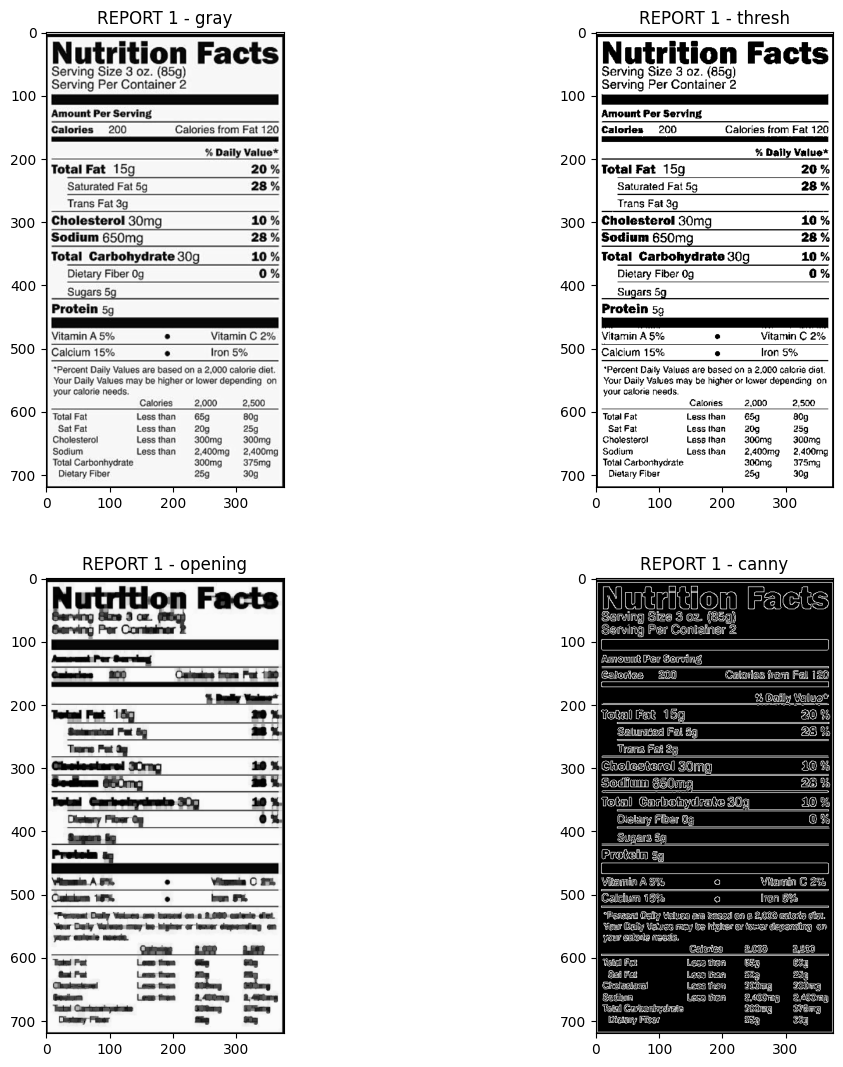

In [11]:
# Plot images after preprocessing

fig = plt.figure(figsize=(13,13))
ax = []

rows = 2
columns = 2
keys = list(images.keys())
for i in range(rows*columns):
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title('REPORT 1 - ' + keys[i])
    plt.imshow(images[keys[i]], cmap='gray')

### Page Segmentation Modes



There are several ways a page of text can be analysed. The tesseract api provides several page segmentation modes if you want to run OCR on only a small region or in different orientations, etc.

Here's a list of the supported page segmentation modes by tesseract -

0    Orientation and script detection (OSD) only.  
1    Automatic page segmentation with OSD.  
2    Automatic page segmentation, but no OSD, or OCR.  
3    Fully automatic page segmentation, but no OSD. (Default)  
4    Assume a single column of text of variable sizes.  
5    Assume a single uniform block of vertically aligned text.  
6    Assume a single uniform block of text.  
7    Treat the image as a single text line.  
8    Treat the image as a single word.  
9    Treat the image as a single word in a circle.  
10    Treat the image as a single character.  
11    Sparse text. Find as much text as possible in no particular order.  
12    Sparse text with OSD.  
13    Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.  

To change your page segmentation mode, change the ```--psm``` argument in your custom config string to any of the above mentioned mode codes.

In [12]:
# Get OCR output using Pytesseract

custom_config = r'--oem 3 --psm 6'
print('-----------------------------------------')
print('TESSERACT OUTPUT --> ORIGINAL IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> THRESHOLDED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> OPENED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> CANNY EDGE IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))

###############################
multiline_string=pytesseract.image_to_string(image, config=custom_config)
print('=========================================')
print("MULTI LINE STRING OUTPUT ")
print('=========================================')
print(multiline_string)
###############################

-----------------------------------------
TESSERACT OUTPUT --> ORIGINAL IMAGE
-----------------------------------------
Nutrition Facts
Serving Size 3 oz. (85g)
Serving Per Container 2
SSS]
Amount Per Serving
Calories 200 Calories from Fat 120
Se]
% Daily Value*
Total Fat 159 20%
Saturated Fat 5g 28%
Trans Fat 3g
Cholesterol 30mg 10 %
Sodium 650mg 28 %
Total Carbohydrate 30g 10%
Dietary Fiber 0g 0%
Sugars 59
Protein 59
Sw
Vitamin A 5% ° Vitamin C 2%
Calcium 15% ° Iron 5%.
*Percent Daily Values are based on a 2,000 calorie diet
Your Daily Values may be higher or lower depending on
your calorie needs.
Calories 2,000 2,500
Total Fat Less than 659 809
Sat Fat Less than 209 259
Cholesterol Less than 300mg 300mg
Sodium Less than 2,400mg _2,400mg
Total Carbonhydrate 300mg =. 375mg
Dietary Fiber 259 309


-----------------------------------------
TESSERACT OUTPUT --> THRESHOLDED IMAGE
-----------------------------------------
Nutrition Facts
Serving Size 3 oz. (85g)
Serving Per Container 2
SS

# Phase 2 :
####Step 1: Data Collection
Gather a collection of images or PDFs containing nutrition information. These documents should be in a format that can be processed by Pytesseract OCR.
####Step 2: Image Preprocessing
Preprocess the images, if needed, to improve OCR accuracy. This may involve resizing, noise reduction, or contrast adjustments.
####Step 3: OCR Processing
Utilize Pytesseract OCR to extract text from the images or PDFs. This step will convert the nutrition information into machine-readable text.
####Step 4: Text Parsing
Parse the OCR output to extract relevant information, such as ingredient details, nutritional values, serving sizes, etc.

###PREPROCESSING DATA

In [13]:
multiline_string = """
Nutrition Facts
Serving Size 3 oz. (85g)
Serving Per Container 2
SSS]
Amount Per Serving
Calories 200 Calories from Fat 120
Se]
% Daily Value*
Total Fat 159 20%
Saturated Fat 5g 28%
Trans Fat 3g
Cholesterol 30mg 10 %
Sodium 650mg 28 %
Total Carbohydrate 30g 10%
Dietary Fiber 0g 0%
Sugars 59
Protein 59
Sw
Vitamin A 5% ° Vitamin C 2%
Calcium 15% ° Iron 5%.
*Percent Daily Values are based on a 2,000 calorie diet
Your Daily Values may be higher or lower depending on
your calorie needs.
Calories 2,000 2,500
Total Fat Less than 659 809
Sat Fat Less than 209 259
Cholesterol Less than 300mg 300mg
Sodium Less than 2,400mg _2,400mg
Total Carbonhydrate 300mg =. 375mg
Dietary Fiber 259 309
"""

# Split the multiline string into lines
lines = multiline_string.strip().split('\n')

# Format the lines with "Ingredient X:" prefix
formatted_lines = [f'Ingredient {i + 1}: {line}' for i, line in enumerate(lines)]

# Join the formatted lines back into a multiline string
formatted_multiline_string = '\n'.join(formatted_lines)

# Print the formatted multiline string
print(formatted_multiline_string)

Ingredient 1: Nutrition Facts
Ingredient 2: Serving Size 3 oz. (85g)
Ingredient 3: Serving Per Container 2
Ingredient 4: SSS]
Ingredient 5: Amount Per Serving
Ingredient 6: Calories 200 Calories from Fat 120
Ingredient 7: Se]
Ingredient 8: % Daily Value*
Ingredient 9: Total Fat 159 20%
Ingredient 10: Saturated Fat 5g 28%
Ingredient 11: Trans Fat 3g
Ingredient 12: Cholesterol 30mg 10 %
Ingredient 13: Sodium 650mg 28 %
Ingredient 14: Total Carbohydrate 30g 10%
Ingredient 15: Dietary Fiber 0g 0%
Ingredient 16: Sugars 59
Ingredient 17: Protein 59
Ingredient 18: Sw
Ingredient 19: Vitamin A 5% ° Vitamin C 2%
Ingredient 20: Calcium 15% ° Iron 5%.
Ingredient 21: *Percent Daily Values are based on a 2,000 calorie diet
Ingredient 22: Your Daily Values may be higher or lower depending on
Ingredient 23: your calorie needs.
Ingredient 24: Calories 2,000 2,500
Ingredient 25: Total Fat Less than 659 809
Ingredient 26: Sat Fat Less than 209 259
Ingredient 27: Cholesterol Less than 300mg 300mg
Ingredie

## Write the pytesseract output to an 'Ingredients List' dictionary

In [14]:
import nltk

# Download NLTK's language detection data (only need to do this once)
nltk.download('words')

# Sample multiline string
multiline_string = """
Ingredient 1: Nutrition Facts
Ingredient 2: Serving Size 3 oz. (85g)
Ingredient 3: Serving Per Container 2
Ingredient 4: SSS]
Ingredient 5: Amount Per Serving
Ingredient 6: Calories 200 Calories from Fat 120
Ingredient 7: Se]
Ingredient 8: % Daily Value*
Ingredient 9: Total Fat 159 20%
Ingredient 10: Saturated Fat 5g 28%
Ingredient 11: Trans Fat 3g
Ingredient 12: Cholesterol 30mg 10 %
Ingredient 13: Sodium 650mg 28 %
Ingredient 14: Total Carbohydrate 30g 10%
Ingredient 15: Dietary Fiber 0g 0%
Ingredient 16: Sugars 59
Ingredient 17: Protein 59
Ingredient 18: Sw
Ingredient 19: Vitamin A 5% ° Vitamin C 2%
Ingredient 20: Calcium 15% ° Iron 5%.
Ingredient 21: *Percent Daily Values are based on a 2,000 calorie diet
Ingredient 22: Your Daily Values may be higher or lower depending on
Ingredient 23: your calorie needs.
Ingredient 24: Calories 2,000 2,500
Ingredient 25: Total Fat Less than 659 809
Ingredient 26: Sat Fat Less than 209 259
Ingredient 27: Cholesterol Less than 300mg 300mg
Ingredient 28: Sodium Less than 2,400mg _2,400mg
Ingredient 29: Total Carbonhydrate 300mg =. 375mg
Ingredient 30: Dietary Fiber 259 309
"""

# Split the multiline string into lines
lines = multiline_string.splitlines()

# Initialize an empty list to store lines with any English word
output_list = []

# Check if any word in each line is an English word and if it contains "fat"
for line in lines:
    words = line.split()
    if words and (any(word in nltk.corpus.words.words() for word in words) and " " in line.lower()):
        output_list.append(line)

# Convert the output_list to a single string
output_string = ' '.join(output_list)

# Store the output in a dictionary with the key "Ingredients List"
energy_drink_data = {"Ingredients List": output_string}

# Print the energy_drink_data dictionary
print("========================")
print(energy_drink_data)
print("========================")

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


{'Ingredients List': 'Ingredient 3: Serving Per Container 2 Ingredient 5: Amount Per Serving Ingredient 6: Calories 200 Calories from Fat 120 Ingredient 15: Dietary Fiber 0g 0% Ingredient 19: Vitamin A 5% ° Vitamin C 2% Ingredient 21: *Percent Daily Values are based on a 2,000 calorie diet Ingredient 22: Your Daily Values may be higher or lower depending on Ingredient 23: your calorie needs. Ingredient 25: Total Fat Less than 659 809 Ingredient 26: Sat Fat Less than 209 259 Ingredient 27: Cholesterol Less than 300mg 300mg Ingredient 28: Sodium Less than 2,400mg _2,400mg Ingredient 30: Dietary Fiber 259 309'}


# Step 5: Data Cleaning

####Saving OCR Multiline Text to a Dictionary

In [15]:
import re

# Sample multiline string with 20 lines
multiline_text = """
Nutrition Facts
Serving Size 3 oz. (85g)
Serving Per Container 2
SSS]
Amount Per Serving
Calories 200 Calories from Fat 120
Se]
% Daily Value*
Total Fat 159 20%
Saturated Fat 5g 28%
Trans Fat 3g
Cholesterol 30mg 10 %
Sodium 650mg 28 %
Total Carbohydrate 30g 10%
Dietary Fiber 0g 0%
Sugars 59
Protein 59
Sw
Vitamin A 5% ° Vitamin C 2%
Calcium 15% ° Iron 5%.
*Percent Daily Values are based on a 2,000 calorie diet
Your Daily Values may be higher or lower depending on
your calorie needs.
Calories 2,000 2,500
Total Fat Less than 659 809
Sat Fat Less than 209 259
Cholesterol Less than 300mg 300mg
Sodium Less than 2,400mg _2,400mg
Total Carbonhydrate 300mg =. 375mg
Dietary Fiber 259 309
"""

# Split the multiline string into lines
lines = multiline_text.strip().split('\n')

# Initialize an empty dictionary
ingredient_dict = {}

# Initialize a dictionary for the first words
first_word_dict = {}

# Loop through the lines and extract lines with numbers
lineno = 0
for i, line in enumerate(lines):
    # Use a regular expression to check if there are any numbers in the line
    if re.search(r'\d', line):
        # Extract the first word from the line
        first_word = line.split()[0]
        lineno += 1
        key = f"ingredient{lineno}"  # Create a key based on line order
        ingredient_dict[key] = line  # Store the line with numbers
        first_word_dict[first_word] = ingredient_dict[key]  # Use the first word as the key in the first_word_dict

# Print the resulting dictionary

print("****************first_word_dict****************")
print(first_word_dict)
print("****************first_word_dict****************")

****************first_word_dict****************
{'Serving': 'Serving Per Container 2', 'Calories': 'Calories 2,000 2,500', 'Total': 'Total Carbonhydrate 300mg =. 375mg', 'Saturated': 'Saturated Fat 5g 28%', 'Trans': 'Trans Fat 3g', 'Cholesterol': 'Cholesterol Less than 300mg 300mg', 'Sodium': 'Sodium Less than 2,400mg _2,400mg', 'Dietary': 'Dietary Fiber 259 309', 'Sugars': 'Sugars 59', 'Protein': 'Protein 59', 'Vitamin': 'Vitamin A 5% ° Vitamin C 2%', 'Calcium': 'Calcium 15% ° Iron 5%.', '*Percent': '*Percent Daily Values are based on a 2,000 calorie diet', 'Sat': 'Sat Fat Less than 209 259'}
****************first_word_dict****************


# Conversion to Grams : Step 16

In [16]:
# Define a function to convert various units to grams
def convert_to_grams(value, unit, serving_size_grams):
    if unit == "grams":
        return value
    elif unit == "milligrams":
        return value / 1000
    elif unit == "Percent":
        return (value / 100) * serving_size_grams
    else:
        return None  # Handle any other units here

# Define a function to convert percentage to grams based on a reference amount
def convert_percent_to_grams(value, reference_grams):
    if value is None:
        return None
    return (value / 100) * reference_grams

# Define a dictionary to store the converted information
converted_info = {}

# The provided information as a dictionary
info = {
    "Serving Size": "85 grams",
    "Calories": ["20", "12"],
    "Calories from Fat": ["0", "0"],
    "Total Fat": ["15 grams", "20 Percent"],
    "Saturated Fat": ["5 grams", "28 Percent"],
    "Trans Fat": ["3 grams"],
    "Cholesterol": ["30 milligrams", "10 Percent"],
    "Sodium": ["650 milligrams", "28 Percent"],
    "Total Carbohydrate": ["300 milligrams", "375 milligrams"],
    "Dietary Fiber": ["25 grams", "9 Percent"],
    "Vitamins": ["Vitamin A: 5 Percent", "Vitamin C: 2 Percent"],
    "Minerals": ["Calcium: 15 Percent", "Iron: 5 Percent"],
    "Percent Daily Values": [
        "Percent Daily Values are based on a 2000 calorie diet.",
        "Calories: 0 Percent",
        "Calories: 50 Percent",
        "Total Fat Less than: 65 Percent",
        "Saturated Fat Less than: 20 Percent",
        "Cholesterol Less than: 300 milligrams",
        "Cholesterol Less than: 300 milligrams",
        "Sodium Less than: 400 milligrams",
        "Sodium Less than: 400 milligrams",
    ],
}

# Reference amounts for percentage values
reference_amounts = {
    "Total Fat": 75,  # Example reference amount in grams
    "Saturated Fat": 18,  # Example reference amount in grams
}

# Initialize serving size
serving_size_grams = None

# Process each item in the dictionary and convert units to grams
for label, values in info.items():
    converted_value = None  # Initialize the variable here
    if label == "Serving Size":
        serving_size_grams = float(values.split()[0])  # Extract the numeric part
    elif "Percent" in values[0] and label in reference_amounts and serving_size_grams is not None:
        value = float(''.join(filter(str.isdigit, values[0])))  # Extract only the digits from the string
        converted_value = convert_to_grams(value, "Percent", serving_size_grams)
    else:
        value = float(''.join(filter(str.isdigit, values[0])))  # Extract only the digits from the string
        converted_value = convert_to_grams(value, "grams", serving_size_grams)
    if converted_value is not None:
        converted_info[label] = converted_value

# Print the converted information
for label, value in converted_info.items():
    print(f"{label}: {value} grams")

Calories: 20.0 grams
Calories from Fat: 0.0 grams
Total Fat: 15.0 grams
Saturated Fat: 5.0 grams
Trans Fat: 3.0 grams
Cholesterol: 30.0 grams
Sodium: 650.0 grams
Total Carbohydrate: 300.0 grams
Dietary Fiber: 25.0 grams
Vitamins: 5.0 grams
Minerals: 15.0 grams
Percent Daily Values: 2000.0 grams


###Steps upto STEP 5

In [18]:
multiline_text = """
Calories: 20.0 grams
Calories from Fat: 0.0 grams
Total Fat: 15.0 grams
Saturated Fat: 5.0 grams
Trans Fat: 3.0 grams
Cholesterol: 30.0 grams
Sodium: 650.0 grams
Total Carbohydrate: 300.0 grams
Dietary Fiber: 25.0 grams
Vitamins: 5.0 grams
Minerals: 15.0 grams
Percent Daily Values: 2000.0 grams
"""

# Split the multiline_text by lines and remove trailing and leading whitespaces
lines = multiline_text.strip().split('\n')

# Generate the new_multiline_text with formatted lines
new_multiline_text = '\n'.join([line.split(' grams')[0] for line in lines])

# Print the new_multiline_text
print(new_multiline_text)


Calories: 20.0
Calories from Fat: 0.0
Total Fat: 15.0
Saturated Fat: 5.0
Trans Fat: 3.0
Cholesterol: 30.0
Sodium: 650.0
Total Carbohydrate: 300.0
Dietary Fiber: 25.0
Vitamins: 5.0
Minerals: 15.0
Percent Daily Values: 2000.0


# Store output in a csv file

In [20]:
import re
import csv
from io import StringIO

# Sample multiline string
multiline_text = """
Calories: 20.0
Calories from Fat: 0.0
Total Fat: 15.0
Saturated Fat: 5.0
Trans Fat: 3.0
Cholesterol: 30.0
Sodium: 650.0
Total Carbohydrate: 300.0
Dietary Fiber: 25.0
Vitamins: 5.0
Minerals: 15.0
Percent Daily Values: 2000.0
"""

# Step 1: Data Cleaning
# Remove any irrelevant or noisy information
lines = [line.strip() for line in multiline_text.split('\n')]

# Step 2: Dataset Creation
# Create a CSV formatted string
output_csv = StringIO()
csv_writer = csv.writer(output_csv)
csv_writer.writerow(["Ingredients", "Amount"])

# Process the lines to extract ingredient names and nutritional values
for line in lines:
    # Use a regular expression to match the component name and numerical value
    match = re.match(r'([A-Za-z\s]+):\s*([\d.]+)', line)
    if match:
        component_name, value = match.groups()
        csv_writer.writerow([component_name, value])

# Get the CSV string
csv_string = output_csv.getvalue()
output_csv.close()

# Save the CSV string to a file
output_file_path = "/content/ocr_repo/30-OCT/dataset/Input_Ingredients_Dataset.csv"
with open(output_file_path, "w") as csv_file:
    csv_file.write(csv_string)

# Print or return the refined CSV string
print("CSV data saved to 'Input_Ingredients_Dataset.csv'")

CSV data saved to 'Input_Ingredients_Dataset.csv'


# Phase 3 :
###Step 7: Ingredient Extraction

Use NLTK to identify and extract ingredient details from the cleaned text. This may involve defining patterns or rules for recognizing ingredients.
###Step 8: Nutritional Data Extraction

Extract nutritional values, such as calories, fats, proteins, and carbohydrates, using NLTK and regular expressions.
###Step 9: Dataset Creation

Organize the extracted data into a structured format, such as a CSV file, where each row represents a product or nutrition label, and columns represent attributes like ingredients and nutritional values.
###Step 10: Ingredient Comparison

Compare the extracted ingredient details against predefined thresholds for harmful substances. If an ingredient surpasses the threshold, calculate the excess amount.

In [30]:
import csv

# Read the contents of "Input_Ingredients_Dataset.csv"
with open("/content/ocr_repo/30-OCT/dataset/Input_Ingredients_Dataset.csv", "r") as input_csv_file:
    input_csv_reader = csv.DictReader(input_csv_file)
    input_ingredients = [row["Ingredients"] for row in input_csv_reader]

# Read the contents of "Ingredients_Dataset_01.csv"
matching_ingredients = set()  # Use a set to store unique matching ingredients

with open("/content/ocr_repo/30-OCT/dataset/Ingredients_Dataset_01.csv", "r") as ingredients_csv_file:
    ingredients_csv_reader = csv.DictReader(ingredients_csv_file)
    for row in ingredients_csv_reader:
        for ingredient in input_ingredients:
            if ingredient.lower() in row["Ingredients"].lower():
                matching_ingredients.add(row["Ingredients"])

# Create a list to store matching records
matching_records = []

# Read "Ingredients_Dataset_01.csv" again to find and store matching records
with open("/content/ocr_repo/30-OCT/dataset/Ingredients_Dataset_01.csv", "r") as ingredients_csv_file:
    ingredients_csv_reader = csv.DictReader(ingredients_csv_file)
    for row in ingredients_csv_reader:
        if row["Ingredients"] in matching_ingredients:
            matching_records.append({
                "Ingredients": row["Ingredients"],
                "Thresholds for Diabetes Mellitus Patient (per serving 50g)": row["Thresholds for Diabetes Mellitus Patient (per serving 50g)"]
            })

# Write matching records to an output CSV
output_csv_file = "/content/ocr_repo/30-OCT/dataset/Input_Matching_Records.csv"
output_columns = ["Ingredients", "Thresholds for Diabetes Mellitus Patient (per serving 50g)"]

with open(output_csv_file, "w", newline="") as output_csv_file:
    csv_writer = csv.DictWriter(output_csv_file, fieldnames=output_columns)
    csv_writer.writeheader()  # Write the header

    for record in matching_records:
        csv_writer.writerow(record)

print("Matching Records saved to Input_Matching_Records.csv")


Matching Records saved to Input_Matching_Records.csv


### TWO INPUT CSV FILES ARE READY FOR MERGE

<hr>

# Phase 4

Generate Merged CSV to generate Graphs

In [31]:
import csv

# Input CSV file A with headers IngredientA, AmountA
input_file1 = '/content/ocr_repo/30-OCT/dataset/Input_Ingredients_Dataset.csv'

# Input CSV file B with headers IngredientB, AmountB
input_file2 = '/content/ocr_repo/30-OCT/dataset/Input_Matching_Records.csv'

# Output CSV file with headers IngredientA, AmountA, IngredientB, AmountB
output_file = '/content/ocr_repo/30-OCT/dataset/Output_Matching_Records.csv'

# Function to merge CSV files
def merge_csv_files(input_file1, input_file2, output_file):
    data_a = []
    data_b = []

    # Read data from Input A CSV
    with open(input_file1, 'r') as file1:
        csv_reader1 = csv.reader(file1)
        headers_a = next(csv_reader1)
        for row in csv_reader1:
            data_a.append(row)

    # Read data from Input B CSV
    with open(input_file2, 'r') as file2:
        csv_reader2 = csv.reader(file2)
        headers_b = next(csv_reader2)
        for row in csv_reader2:
            data_b.append(row)

    # Create the Output CSV
    with open(output_file, 'w', newline='') as output_csvfile:
        csv_writer = csv.writer(output_csvfile)

        # Create a list of words in headers_a
        words_a = []
        for header in headers_a:
            words_a.extend(header.split(','))

        # Create a list of words in headers_b
        words_b = []
        for header in headers_b:
            words_b.extend(header.split(','))

        # Write combined headers
        csv_writer.writerow(headers_a + headers_b)

        # Iterate through data_a and data_b
        for row_a in data_a:
            for row_b in data_b:
                # Check if any word in headers_a matches any word in headers_b
                if any(word_a in words_b for word_a in words_a):
                    csv_writer.writerow(row_a + row_b)

# Merge the CSV files
merge_csv_files(input_file1, input_file2, output_file)

# Function to clean the output CSV
def clean_output_csv(output_file):
    cleaned_data = []

    # Read data from Output CSV
    with open(output_file, 'r') as file:
        csv_reader = csv.reader(file)
        headers = next(csv_reader)
        cleaned_data.append(headers)

        for row in csv_reader:
            ingredient_a = row[0]
            ingredient_b = row[2]

            # Check if there is a common word in Column A and Column C
            common_word = any(word in ingredient_a for word in ingredient_b.split())

            if common_word:
                cleaned_data.append(row)

    # Write cleaned data back to the Output CSV
    with open(output_file, 'w', newline='') as output_csvfile:
        csv_writer = csv.writer(output_csvfile)
        csv_writer.writerows(cleaned_data)

# Clean the output CSV
clean_output_csv(output_file)

In [ ]:
import csv
from io import StringIO

# Read the contents of "Input_Ingredients_Dataset.csv"
with open("/content/ocr_repo/30-OCT/dataset/Input_Ingredients_Dataset.csv", "r") as input_csv_file:
    input_csv_reader = csv.DictReader(input_csv_file)
    input_ingredients = [row["Ingredients"] for row in input_csv_reader]

# Read the contents of "Ingredients_Dataset_01.csv"
matching_ingredients = set()  # Use a set to store unique matching ingredients

with open("/content/ocr_repo/30-OCT/dataset/Ingredients_Dataset_01.csv", "r") as ingredients_csv_file:
    ingredients_csv_reader = csv.DictReader(ingredients_csv_file)
    matching_ingredients_dataset = [row["Ingredients"] for row in ingredients_csv_reader]

# Filter matching ingredients based on word matches
for ingredient in input_ingredients:
    for dataset_ingredient in matching_ingredients_dataset:
        if any(word.lower() in ingredient.lower() for word in dataset_ingredient.split()):
            matching_ingredients.add(dataset_ingredient)

# Store the data in a CSV formatted string
csv_output_string = StringIO()
csv_writer = csv.writer(csv_output_string)
csv_writer.writerow(["Input Ingredients", "Matching Ingredients"])

for input_ingredient in input_ingredients:
    matching = " ".join([ingredient for ingredient in matching_ingredients if any(word.lower() in input_ingredient.lower() for word in ingredient.split())])
    csv_writer.writerow([input_ingredient, matching])

# Print the CSV formatted string
print(csv_output_string.getvalue())

# Alternatively, you can save the CSV string to a file:
# with open("matching_ingredients.csv", "w") as output_csv_file:
#     output_csv_file.write(csv_output_string.getvalue())

Input Ingredients,Matching Ingredients
Calories,Cellulose (used as a filler) Titanium Dioxide (used as a whitening agent)
Calories from Fat,Cellulose (used as a filler) Olestra (a fat substitute) Titanium Dioxide (used as a whitening agent)
Total Fat,Cellulose (used as a filler) Olestra (a fat substitute) Titanium Dioxide (used as a whitening agent)
Saturated Fat,Cellulose (used as a filler) Olestra (a fat substitute) Titanium Dioxide (used as a whitening agent)
Trans Fat,Cellulose (used as a filler) Olestra (a fat substitute) Titanium Dioxide (used as a whitening agent) Trans Fats (partially hydrogenated oils)
Cholesterol,
Sodium,"Sodium Metabisulfite Sodium Sulfate Sodium Stearoyl Lactylate Sodium Acetate Sodium Lauryl Sulfate (used in some food foaming agents) Sodium Bisulfite Sodium Propionate Sodium Thiosulfate Sodium Sulfite Sodium Phosphate Sodium Tripolyphosphate Sodium Nitrite Sodium Aluminum Sulfate Sodium Erythorbate Sodium Aluminum Silicate Sodium Benzoate Sodium Diacetate 

In [ ]:
import csv
from io import StringIO

# Read the contents of "Input_Ingredients_Dataset.csv"
with open("/content/ocr_repo/30-OCT/dataset/Input_Ingredients_Dataset.csv", "r") as input_csv_file:
    input_csv_reader = csv.DictReader(input_csv_file)
    input_ingredients = [row["Ingredients"] for row in input_csv_reader]

# Read the contents of "Ingredients_Dataset_01.csv"
matching_ingredients = set()  # Use a set to store unique matching ingredients

with open("/content/ocr_repo/30-OCT/dataset/Ingredients_Dataset_01.csv", "r") as ingredients_csv_file:
    ingredients_csv_reader = csv.DictReader(ingredients_csv_file)
    for row in ingredients_csv_reader:
        for ingredient in input_ingredients:
            if any(word.lower() in ingredient.lower() for word in row["Ingredients"].split()):
                matching_ingredients.add(row["Ingredients"])

# Store the data in a CSV formatted string
csv_output_string = StringIO()
csv_writer = csv.writer(csv_output_string)
csv_writer.writerow(["Input Ingredients", "Matching Ingredients"])

for input_ingredient in input_ingredients:
    matching = " ".join([ingredient for ingredient in matching_ingredients if any(word.lower() in input_ingredient.lower() for word in ingredient.split())])
    csv_writer.writerow([input_ingredient, matching])

# Print the CSV formatted string
print(csv_output_string.getvalue())

# Alternatively, you can save the CSV string to a file:
# with open("matching_ingredients.csv", "w") as output_csv_file:
#     output_csv_file.write(csv_output_string.getvalue())

Input Ingredients,Matching Ingredients
Calories,Cellulose (used as a filler) Titanium Dioxide (used as a whitening agent)
Calories from Fat,Cellulose (used as a filler) Olestra (a fat substitute) Titanium Dioxide (used as a whitening agent)
Total Fat,Cellulose (used as a filler) Olestra (a fat substitute) Titanium Dioxide (used as a whitening agent)
Saturated Fat,Cellulose (used as a filler) Olestra (a fat substitute) Titanium Dioxide (used as a whitening agent)
Trans Fat,Cellulose (used as a filler) Olestra (a fat substitute) Titanium Dioxide (used as a whitening agent) Trans Fats (partially hydrogenated oils)
Cholesterol,
Sodium,"Sodium Metabisulfite Sodium Sulfate Sodium Stearoyl Lactylate Sodium Acetate Sodium Lauryl Sulfate (used in some food foaming agents) Sodium Bisulfite Sodium Propionate Sodium Thiosulfate Sodium Sulfite Sodium Phosphate Sodium Tripolyphosphate Sodium Nitrite Sodium Aluminum Sulfate Sodium Erythorbate Sodium Aluminum Silicate Sodium Benzoate Sodium Diacetate 

In [ ]:
import csv
from io import StringIO

# Read the contents of "Input_Ingredients_Dataset.csv"
with open("/content/ocr_repo/30-OCT/dataset/Input_Ingredients_Dataset.csv", "r") as input_csv_file:
    input_csv_reader = csv.DictReader(input_csv_file)
    input_ingredients = [row["Ingredients"] for row in input_csv_reader]

# Read the contents of "Ingredients_Dataset_01.csv"
matching_ingredients = set()  # Use a set to store unique matching ingredients

with open("/content/ocr_repo/30-OCT/dataset/Ingredients_Dataset_01.csv", "r") as ingredients_csv_file:
    ingredients_csv_reader = csv.DictReader(ingredients_csv_file)
    for row in ingredients_csv_reader:
        for ingredient in input_ingredients:
            if ingredient.lower() in row["Ingredients"].lower():
                matching_ingredients.add(row["Ingredients"])

# Store the data in a CSV formatted string
csv_output_string = StringIO()
csv_writer = csv.writer(csv_output_string)
csv_writer.writerow(["Input Ingredients", "Matching Ingredients"])

for input_ingredient in input_ingredients:
    csv_writer.writerow([input_ingredient, ""] if input_ingredient not in matching_ingredients else [input_ingredient, input_ingredient])

# Print the CSV formatted string
print(csv_output_string.getvalue())

# Alternatively, you can save the CSV string to a file:
# with open("matching_ingredients.csv", "w") as output_csv_file:
#     output_csv_file.write(csv_output_string.getvalue())


Input Ingredients,Matching Ingredients
Calories,
Calories from Fat,
Total Fat,
Saturated Fat,
Trans Fat,
Cholesterol,
Sodium,
Total Carbohydrate,
Dietary Fiber,
Vitamins,
Minerals,
Percent Daily Values,



In [ ]:
import csv

# Read the contents of "Input_Ingredients_Dataset.csv"
with open("/content/ocr_repo/30-OCT/dataset/Input_Ingredients_Dataset.csv", "r") as input_csv_file:
    input_csv_reader = csv.DictReader(input_csv_file)
    input_ingredients = [row["Ingredients"] for row in input_csv_reader]
    input_ingredients_value = [row["Amount"] for row in input_csv_reader]

# Read the contents of "Ingredients_Dataset_01.csv"
matching_ingredients = set()  # Use a set to store unique matching ingredients

with open("/content/ocr_repo/30-OCT/dataset/Ingredients_Dataset_01.csv", "r") as ingredients_csv_file:
    ingredients_csv_reader = csv.DictReader(ingredients_csv_file)
    for row in ingredients_csv_reader:
        for ingredient in input_ingredients:
            if ingredient.lower() in row["Ingredients"].lower():
                matching_ingredients.add(row["Ingredients"])

print("Input Ingredients:")
print(input_ingredients)

print("Matching Ingredients:")
print("\n".join(matching_ingredients))  # Print unique matching ingredients

# Write the data to "Comparison_Ingredients_Dataset.csv"
with open("/content/ocr_repo/30-OCT/dataset/Comparison_Ingredients_Dataset.csv", "w", newline="") as comparison_csv_file:
    csv_writer = csv.writer(comparison_csv_file)
    csv_writer.writerow(["Input Ingredients", "Input Ingredients Value", "Matching Ingredients"])

    for input_ingredient, input_ingredient_value in zip(input_ingredients, input_ingredients_value):
        csv_writer.writerow([input_ingredient, input_ingredient_value, "\n".join(matching_ingredients)])


Input Ingredients:
['Serving Size oz', 'Calories Calories from Fat', 'Calories Calories from Fat', 'Total Fat', 'Saturated Fat', 'Saturated Fat', 'Trans Fat', 'Cholesterol', 'Cholesterol', 'Sodium', 'Sodium', 'Total Carbohydrate', 'Total Carbohydrate', 'Vitamin A Vitamin C', 'Vitamin A Vitamin C', 'Calcium Iron', 'Calcium Iron', 'Calories', 'Calories', 'Cholesterol Less than', 'Cholesterol Less than', 'Sodium Less than', 'Sodium Less than']
Matching Ingredients:
Sodium Lauryl Sulfate (used in some food foaming agents)
Sodium Sorbate
Sodium Citrate
Sodium Metabisulfite
Sodium Acetate
Sodium Hexametaphosphate
Sodium Tripolyphosphate
Disodium Inosinate
Sodium Hexametaphosphate (a food additive)
Disodium Phosphate (a food additive)
Artificial Preservatives (e.g., sodium erythorbate)
Monosodium Glutamate (MSG)
Sodium Aluminum Sulfate
Sodium Diacetate (a flavoring agent)
Disodium Inosinate and Disodium Guanylate (flavor enhancers)
Sodium Propionate
Calcium Disodium EDTA
Monosodium Phosphate


<hr><hr>